## High Performance Rainfall Prediction

Given *data about previous rainfall*, we need to predict if **rainfall** will occur tomorrow. 

Data source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

### Getting Started

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('archive/weatherAUS.csv')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.drop('Date', axis=1, inplace=True)

### Preprocessing

In [6]:
df = data.copy()

In [7]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['RainToday'] = df['RainToday'].fillna('No')

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

In [13]:
df.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
label_encoder = LabelEncoder()

label_encoder_columns = ['RainToday', 'RainTomorrow']

for column in label_encoder_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
df['RainToday'].unique()

array([0, 1])

In [16]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [17]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'Location': array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
        'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
        'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
        'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
        'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
        'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object),
 'WindGustDir': array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
        'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object),
 'WindDir9am': array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
        'WSW', 'ESE', 'E', 'NW',

In [18]:
def add_column_prefixes(df, column, prefix):
    return df[column].apply(lambda x: prefix + str(x))

In [19]:
add_column_prefixes(df, 'WindGustDir', 'Gust_')

0           Gust_W
1         Gust_WNW
2         Gust_WSW
3          Gust_NE
4           Gust_W
            ...   
145455      Gust_E
145456    Gust_NNW
145457      Gust_N
145458     Gust_SE
145459    Gust_nan
Name: WindGustDir, Length: 145460, dtype: object

In [20]:
df['WindDir9am'] = add_column_prefixes(df, 'WindDir9am', '9_')
df['WindDir3pm'] = add_column_prefixes(df, 'WindDir3pm', '3_')

In [21]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,9_W,3_WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,9_NNW,3_WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,9_W,3_WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,9_SE,3_E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,9_ENE,3_NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,9_SE,3_ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,9_SE,3_N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,9_SE,3_WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,9_SSE,3_N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [22]:
pd.get_dummies(df['WindGustDir'], dtype=int)

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
145457,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [24]:
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df = onehot_encode(df, categorical_features)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df.dtypes

MinTemp        float64
MaxTemp        float64
Rainfall       float64
Evaporation    float64
Sunshine       float64
                ...   
3_SW             int64
3_W              int64
3_WNW            int64
3_WSW            int64
3_nan            int64
Length: 117, dtype: object

In [26]:
df.isnull().sum() > 0

MinTemp         True
MaxTemp         True
Rainfall        True
Evaporation     True
Sunshine        True
               ...  
3_SW           False
3_W            False
3_WNW          False
3_WSW          False
3_nan          False
Length: 117, dtype: bool

In [27]:
def impute_means(data, columns):
    for column in columns:
        if data[column].isna().sum() > 0:
            data[column] = data[column].fillna(data[column].mean())

In [30]:
na_columns = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm'
]

In [31]:
impute_means(df, na_columns)

In [33]:
df.isna().sum().sum()

np.int64(0)

In [35]:
y = df['RainTomorrow'].copy()
X = df.drop('RainTomorrow', axis=1).copy()

In [36]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [37]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [39]:
scaler = RobustScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,0.142857,0.019608,0.6,0.0,0.0,0.333333,0.583333,0.485213,0.076923,-1.054968,-1.198788,-0.982637,1.184180,0.000000,0.010870,0.042105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.516484,0.235294,0.0,0.0,0.0,0.333333,-0.750000,0.303395,-0.961538,-0.947826,-0.849390,-0.898300,0.000000,0.000000,0.043478,0.305263,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.087912,0.294118,0.0,0.0,0.0,0.466667,0.500000,0.667031,-1.192308,-0.769254,-1.210836,-0.789866,0.000000,-1.254965,0.456522,0.189474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.318681,0.519608,0.0,0.0,0.0,-1.000000,-0.166667,-0.878423,-0.923077,-1.269254,-0.006017,-0.295890,0.000000,0.000000,0.141304,0.536842,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.593407,0.941176,1.0,0.0,0.0,0.133333,-0.500000,0.121577,0.500000,-0.662111,-0.825294,-1.115167,0.850846,1.745035,0.108696,0.873684,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Training

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [44]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 116)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           1,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

epochs = 10
batch_size = 32

In [52]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8671 - loss: 0.3089 - val_accuracy: 0.8584 - val_loss: 0.3291
Epoch 2/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8675 - loss: 0.3083 - val_accuracy: 0.8566 - val_loss: 0.3293
Epoch 3/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8673 - loss: 0.3076 - val_accuracy: 0.8587 - val_loss: 0.3302
Epoch 4/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8675 - loss: 0.3075 - val_accuracy: 0.8599 - val_loss: 0.3292
Epoch 5/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8676 - loss: 0.3068 - val_accuracy: 0.8568 - val_loss: 0.3320
Epoch 6/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8678 - loss: 0.3068 - val_accuracy: 0.8579 - val_loss: 0.3358
Epoch 7/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8679 - loss: 0.3065 - val_accuracy: 0.8584 - val_loss: 0.3306
Epoch 8/10
2546/2546 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8676 - loss: 0.30

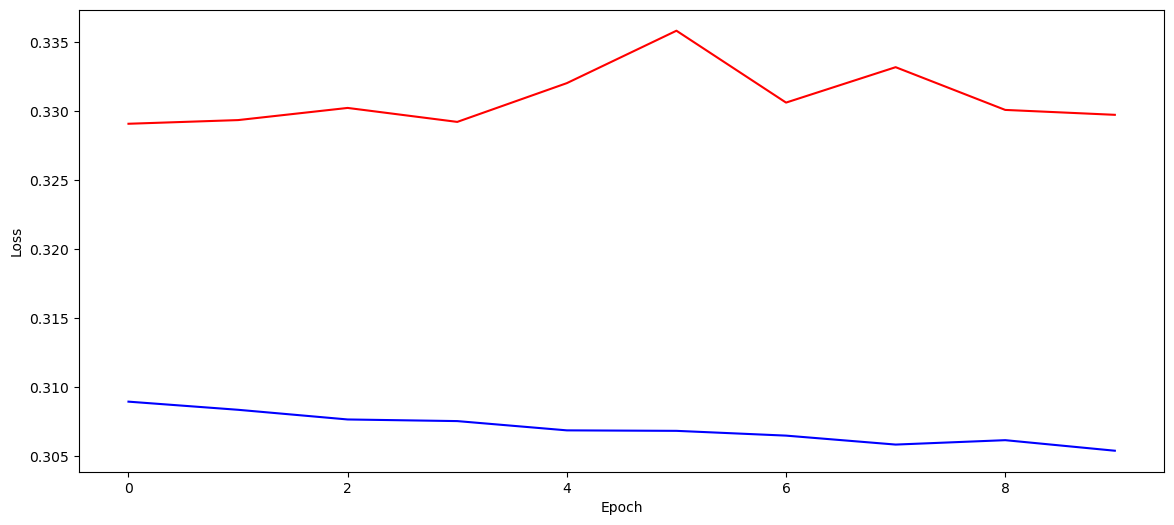

In [53]:
plt.figure(figsize=(14, 6))

plt.plot(range(epochs), history.history['loss'], color='b')
plt.plot(range(epochs), history.history['val_loss'], color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [54]:
history.history['val_loss']

[0.3290615677833557,
 0.32932764291763306,
 0.33020853996276855,
 0.3291965126991272,
 0.3320051431655884,
 0.3358021080493927,
 0.3305950462818146,
 0.3331605792045593,
 0.3300645351409912,
 0.32970914244651794]

### Results

In [55]:
print(f"Model Accuracy: {model.evaluate(X_test, y_test)[1]}")

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.3287
Model Accuracy: 0.8589761257171631


In [57]:
y.sum() * 100 / len(y)

np.float64(21.914615701911178)

In [59]:
y_pred = model.predict(X_test)

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [64]:
y_pred

array([[0.83270174, 0.16729832],
       [0.8915819 , 0.10841805],
       [0.42539707, 0.5746029 ],
       ...,
       [0.98559266, 0.01440728],
       [0.80754775, 0.19245231],
       [0.988886  , 0.01111399]], dtype=float32)

In [65]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
f1_score(y_test, y_pred)

0.6363743795792957

In [68]:
print(f"Model F1 Score: {f1_score(y_test, y_pred)}")

Model F1 Score: 0.6363743795792957
